<a href="https://colab.research.google.com/github/EngComp-Henrique/Numerical-methods/blob/main/Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revisão

## Data: 16/09/2022

### Conteúdo da aula

* Revisão `numpy`


## Numpy

* Pacote para computação científica com Python
* Operações multidimensionais com arrays vetorizados
* Integração com C/C++ e Fotran
* Recursos de álgebra linear

-------------------------
## Tipo básico
* Array que possui caracteristícas simalares as listas do python
* A diferença é que os `ndarrays` executam operações vetorizáveis
--------------------
### Analisando operações com o tipo `list` do python
* Declarando lista ↓

In [ ]:
a = list(range(1, 5))
b = list(range(5, 9))

In [ ]:
a + b

[1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
a * b

TypeError: ignored

In [ ]:
a / b

TypeError: ignored

Perceba que as duas operações acima dão erro, enquanto que a primeira operação concatena as listas, ou seja, não há soma dos elementos
--------------
## Trabalhando com `ndarray`

* Agora vamos realizar as mesmas operações, mas com as estruturas disponíveis pelo `numpy`

In [ ]:
import numpy as np

a = np.array(list(range(1, 5)))
b = np.array(list(range(5, 9)))

In [ ]:
a, b

(array([1, 2, 3, 4]), array([5, 6, 7, 8]))

In [ ]:
a + b

array([ 6,  8, 10, 12])

In [ ]:
a * b

array([ 5, 12, 21, 32])

In [ ]:
a / b

array([0.2       , 0.33333333, 0.42857143, 0.5       ])

### Quais as vantangens `ndarray`
* Vetorização 
* Broadcast de operações
* Diferença de tempo. Abaixo é calculado os tempos da soma de elementos de uma lista

In [ ]:
l = list(range(100000000))
v = np.array(l)

In [ ]:
%%timeit
s = 0
for i in l:
  s += i

4.35 s ± 181 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
v.sum()

73.9 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
sum(l)

573 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Perceba a disparidade de tempo entre as funções executadas

## Arrays multidimensionais
* Arrays são estruturas que armazenam dados de mesmo tipo de valor
* Existem várias funções para criar arrays multidimensionais
* São muito úteis os vetores
  * De zeros e uns
  * com sequência

In [ ]:
np.zeros(shape=4)

array([0., 0., 0., 0.])

In [ ]:
np.ones(shape=4)

array([1., 1., 1., 1.])

In [ ]:
np.full(shape=4, fill_value=99)

array([99, 99, 99, 99])

## Mudando o shape de arrays

In [ ]:
A = np.array([4, 7, 5, 1, 9, 7, 4, 0])
A.shape

(8,)

In [ ]:
A.shape = 2, 4
print(f"Matriz: {A}\n\n Shape = {A.shape}")

Matriz: [[4 7 5 1]
 [9 7 4 0]]

 Shape = (2, 4)


In [ ]:
A.shape = 2,2,2
print(f"Matriz: {A}\n\n Shape = {A.shape}")

Matriz: [[[4 7]
  [5 1]]

 [[9 7]
  [4 0]]]

 Shape = (2, 2, 2)


## Sequência regulares
* É possível criar sequências numéricas com `numpy`

Criando uma sequência numérica, com intervalo [start, stop), onde podemos passar um passo (step) que por default é 0

In [ ]:
a = np.arange(start=0, stop=12, step=2)
a

array([ 0,  2,  4,  6,  8, 10])

Criar um vetor controlado com uma quantidade de números que estejam dentro de um intervalo: [start, stop] e o espaçamento entre os valores é linear

In [ ]:
b = np.linspace(start=0, stop=20, num=10)
b

array([ 0.        ,  2.22222222,  4.44444444,  6.66666667,  8.88888889,
       11.11111111, 13.33333333, 15.55555556, 17.77777778, 20.        ])

Funciona como o `np.linspace`, entretanto com intervalos logaritmicos e geométricos respectivamente

In [ ]:
c = np.logspace(start=-3, stop=3, num=7, base=2)
c

array([0.125, 0.25 , 0.5  , 1.   , 2.   , 4.   , 8.   ])

In [ ]:
d = np.geomspace(start=2 ** (-3), stop=2**3, num=7)
d

array([0.125, 0.25 , 0.5  , 1.   , 2.   , 4.   , 8.   ])

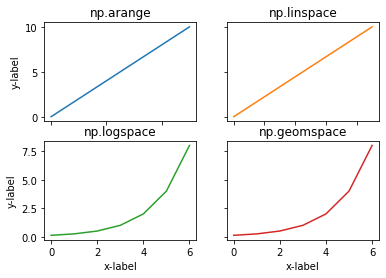

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(a)
axs[0, 0].set_title('np.arange')
axs[0, 1].plot(b, 'tab:orange')
axs[0, 1].set_title('np.linspace')
axs[1, 0].plot(c, 'tab:green')
axs[1, 0].set_title('np.logspace')
axs[1, 1].plot(d, 'tab:red')
axs[1, 1].set_title('np.geomspace')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Fatiamentos 
Além dos arrays, é possível fazer fatiamento em matrizes de uma forma mais elegante. Veja os exemplos abaixo

In [ ]:
A = np.linspace(100, 110, 11)

In [ ]:
A[0:2]

array([100., 101.])

In [ ]:
A[:2]

array([100., 101.])

In [ ]:
A[2:]

array([102., 103., 104., 105., 106., 107., 108., 109., 110.])

In [ ]:
A[-2:]

array([109., 110.])

In [ ]:
A[::2]

array([100., 102., 104., 106., 108., 110.])

### Conjuntos
Podemos fazer fatiamentos, informando as posições que queremos!

In [ ]:
A[[1, 5, 9]]

array([101., 105., 109.])

In [ ]:
A[[1, -5, 9]]

array([101., 106., 109.])

Gerando uma matriz de elementos aleatórios

In [ ]:
A = np.random.rand(3, 4)

array([[0.80116327, 0.50160651, 0.60694697, 0.86122793],
       [0.07544157, 0.44288017, 0.27776636, 0.18605556],
       [0.05543625, 0.82170667, 0.96933508, 0.57478119]])

In [ ]:
A[0, :]

array([0.80116327, 0.50160651, 0.60694697, 0.86122793])

In [ ]:
A[0:2, :]

array([[0.80116327, 0.50160651, 0.60694697, 0.86122793],
       [0.07544157, 0.44288017, 0.27776636, 0.18605556]])

In [ ]:
A[:, 0:3]

array([[0.80116327, 0.50160651, 0.60694697],
       [0.07544157, 0.44288017, 0.27776636],
       [0.05543625, 0.82170667, 0.96933508]])

In [ ]:
A[0:2, 0:3]

array([[0.80116327, 0.50160651, 0.60694697],
       [0.07544157, 0.44288017, 0.27776636]])